In [86]:
from bs4 import BeautifulSoup as bts
import requests
import pandas as pd

In [87]:
def getAndParseURL(url):
    result = requests.get(url,headers={"User-Agent": "Mozilla/5.0"})
    soup = bts(result.text, "html.parser")
    return soup


<!DOCTYPE html>

<html lang="tr">
<head>
<script>window.isMobile = /Mobile|iP(hone|od|ad)|Android|BlackBerry|IEMobile/.test(navigator.userAgent);
  window.matchMobile = window.matchMedia('(max-width: 991px)').matches;
  window.tablet = window.matchMedia('(min-width:992px) and (max-width: 1200px)').matches;

</script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport">
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.zingat.com/maltepe-satilik" rel="canonical"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="knl5mzi7n3xgz1a271qsq7ut2upmno" name="facebook-domain-verification"><title>Satılık Daire Fiyatları ve Satılık Ev İlanları - Zingat</title><meta content="Satılık Daire Fiyatları ve Satılık Ev İlanları - Zingat" name="og:title">
<meta content="Satılık Daire Fiyatları ve Satılık Ev İl
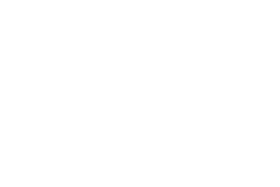
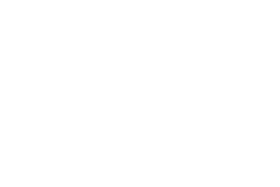
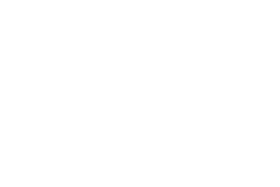
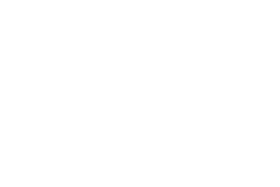
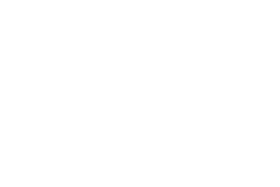
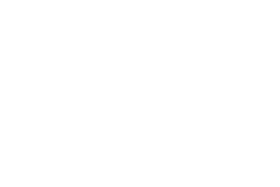
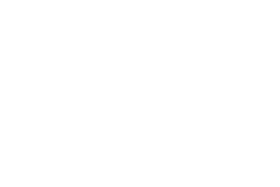
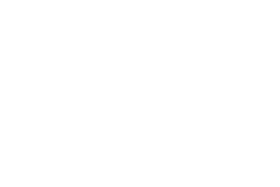
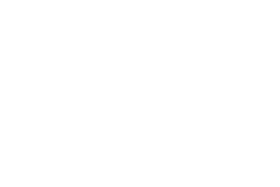
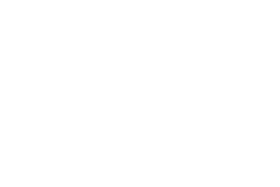
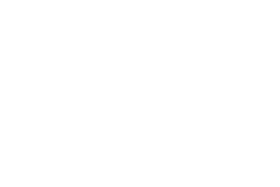
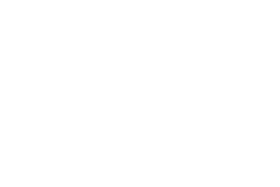
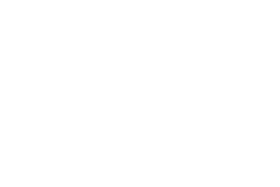
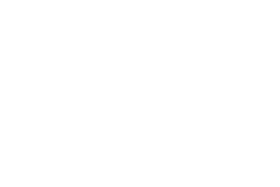
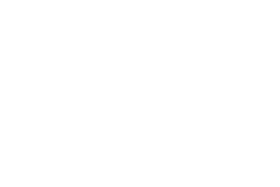
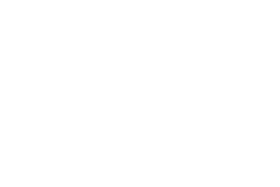
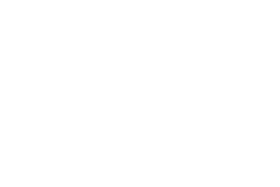
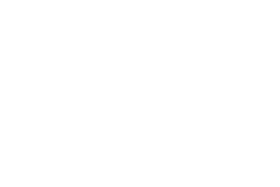
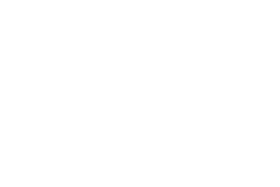
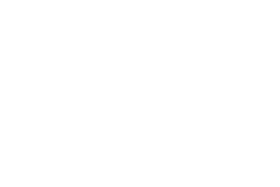
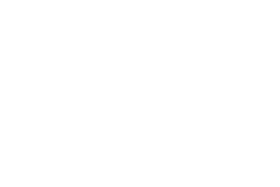
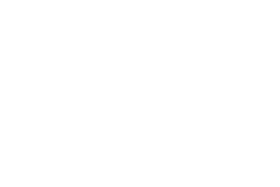
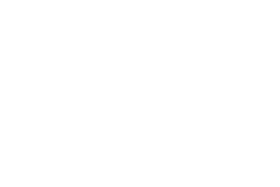
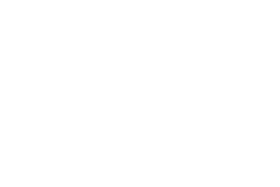
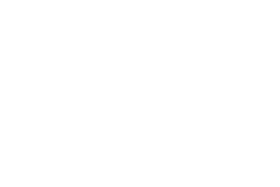
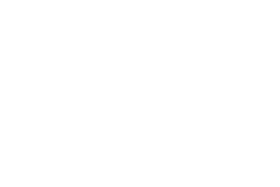
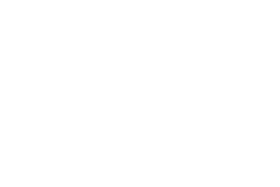
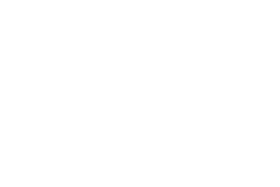
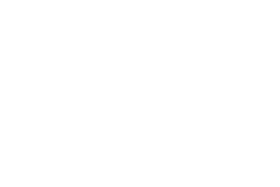
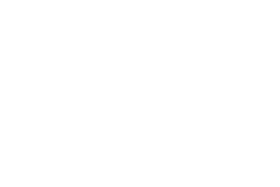
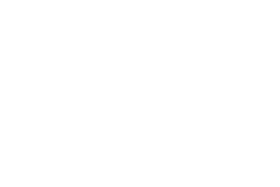
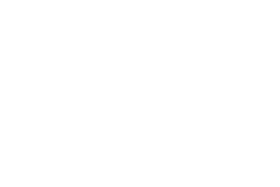
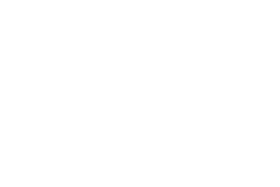
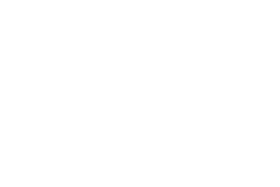
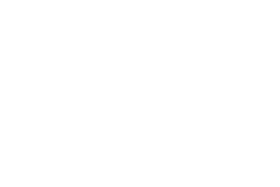
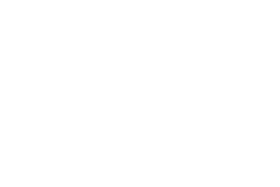
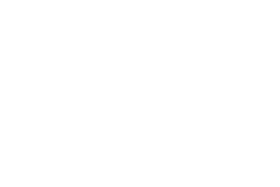
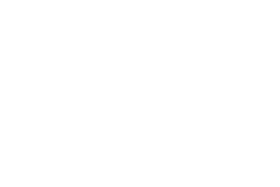
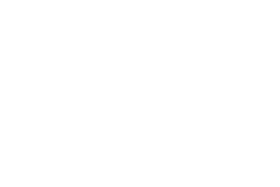

In [88]:
getAndParseURL("https://www.zingat.com/maltepe-satilik")

In [89]:
def lastPageNumber(url):
    soup = getAndParseURL(url)
    last_page_number = soup.find("span", {'class':"zng-pagination-link-text zng-pagination-mobile-visible"}).text.split(" ")[2]
    return last_page_number

In [90]:
lastPageNumber("https://www.zingat.com/kadikoy-satilik")

'48'

In [91]:
link_list = []
def createLinkList(url):
    for link in range (2,int(lastPageNumber(url))):
        link_list.append(url+ "?page=" +str(link))

In [92]:
createLinkList("https://www.zingat.com/kadikoy-satilik")
createLinkList("https://www.zingat.com/maltepe-satilik")
createLinkList("https://www.zingat.com/uskudar-satilik")
createLinkList("https://www.zingat.com/kartal-satilik")
createLinkList("https://www.zingat.com/umraniye-satilik")
createLinkList("https://www.zingat.com/atasehir-satilik")
createLinkList("https://www.zingat.com/adalar-satilik")
createLinkList("https://www.zingat.com/beykoz-satilik")
createLinkList("https://www.zingat.com/cekmekoy-satilik")
createLinkList("https://www.zingat.com/pendik-satilik")
createLinkList("https://www.zingat.com/sancaktepe-satilik")
createLinkList("https://www.zingat.com/sultanbeyli-satilik")
createLinkList("https://www.zingat.com/sile-satilik")
createLinkList("https://www.zingat.com/tuzla-satilik")


In [93]:
len(link_list)

402

In [94]:
TITLE = []
PRICE = []
LOCATION = []
AREA = []
ROOM = []

for products in link_list[::]:
    soups = getAndParseURL(products)

    for title in soups.find_all("div", {'class':"zlc-title"}):
        TITLE.append(title.text.split("\n")[0])

    for price in soups.find_all("div",{"class":"feature-item feature-price"}):
        PRICE.append(int(price.text.split(" ")[0].replace(".","")))

    for location in soups.find_all("div",{"class":"zlc-location"}):
        LOCATION.append(location.text.split("\n")[1])

    for area in soups.find_all("div",{"class":"zlc-tags"}):
        AREA.append(area.text.split("\n")[1])

    for room in soups.find_all("div",{"class":"zlc-tags"}):
        ROOM.append(room.text.split("\n")[0])

In [ ]:
df = pd.DataFrame(list(zip(TITLE, PRICE, LOCATION, ROOM, AREA)), columns=["TITLE", "PRICE", "LOCATION", "ROOM", "AREA"])
